In [9]:
#SETTING PATH 
path="/sharedFolder/Data/HTGTS/4_Junction_Jianli_final/junction_pooled/"
previousResults="/sharedFolder/Results/Hotspot/"
results="/sharedFolder/Results/Idelalisib"
dir.create(results,recursive=TRUE)
riderPath="/home/Riderv2/"

In [10]:
#LOAD USEFULL FUNCTIONS 
noExt=function(x){
return(tools::file_path_sans_ext(x))
}
bnoExt=function(x){
return(basename(tools::file_path_sans_ext(x)))
}
fNumber=function(x){
sapply(x,FUN=function(x){
strsplit(x,"__")[[1]][2]
})
}
rRider=function(x){
sapply(x,FUN=function(x){
strsplit(x,"-RIDER")[[1]][1]
})
}
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}

In [11]:
#LOAD LIBRARIES 
library("argparser");
library(gtools);
library("GenomicRanges");
library("ggVennDiagram");
options(warn=-1)
library(GenomicRanges)

In [12]:
#Load Data
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
a=list.files(path,pattern=".bed",recursive=TRUE)
a=mixedsort(a)
a2=sapply(a,FUN=function(x){strsplit(x,".bed")[[1]][1]})
a2=sapply(a2,FUN=function(x){strsplit(x,"__")[[1]][2]})

In [13]:
print("Idelalisib ANALYSIS")
path="/sharedFolder/Data/1_HTGTS/3_JunctionPaper/junction_pooled/"
dir.create(results,recursive=TRUE)

[1] "Idelalisib ANALYSIS"


In [14]:
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
DatabaseTEMP=Database[grep("WT",Database[,6]),]
DatabaseTEMP2=Database[grep("Idelalisib",Database[,6]),]

Database=rbind(DatabaseTEMP2,DatabaseTEMP)
a=list.files(path,pattern=".bed",recursive=TRUE)
a=mixedsort(a)
a2=sapply(a,FUN=function(x){strsplit(x,".bed")[[1]][1]})
a2=sapply(a2,FUN=function(x){strsplit(x,"__")[[1]][2]})
a2=c(a2[grep("WT",a2)],a2[grep("AID_KO",a2)],a2[grep("Idelalisib",a2)])
a=c(a[grep("WT",a)],a[grep("AID_KO",a)],a[grep("Idelalisib",a)])

In [15]:
hgtgts_count=matrix(0,ncol=length(unique(Database[,7])),nrow=length(a2))
colnames(hgtgts_count)=sapply(unique(Database[,7]),FUN=toString)
rownames(hgtgts_count)=a2
hgtgts_rpm=hgtgts_count
hgtgts_fpkm=hgtgts_count
for(j in a){
    system(paste("echo",j))
temp=read.table(paste(path,"/",j,sep=""),sep="\t")
tempGG=GRanges(seqnames=as.matrix(temp[,1]),ranges=IRanges(start = as.numeric(temp[,2]),end=as.numeric(temp[,3])))    
    for(i in seq(nrow(Database))){
        system(paste("echo",i/nrow(Database)))
        gg=GRanges(seqnames=as.matrix(Database[i,1]),ranges=IRanges(start = as.numeric(Database[i,2]),end=as.numeric(Database[i,3])))    
        over=countOverlaps(gg,tempGG)
        name=as.vector(noExt(fNumber(j)))
        hgtgts_count[name,toString(Database[i,7])]= over
        hgtgts_rpm[name,toString(Database[i,7])]= ((over)/nrow(temp))*1000000
   }

}
dir.create(paste(results,"/RPMCOmparison/",sep=""))

hgtgts_rpmDMSO=hgtgts_rpm[,sort((hgtgts_rpm["Idelalisib_DMSO",]+0.00000001)/(hgtgts_rpm["AID_WT_DMSO",]+0.00000001),index.return=TRUE,decreasing=TRUE)$ix]

write.table((t(hgtgts_rpmDMSO)),paste(results,"/RPMCOmparison/","rpm_hgtgtsHeatmapDMSO.csv",sep=""),col.names=NA,sep=",")
write.table(t(hgtgts_rpm),paste(results,"/RPMCOmparison/","rpm_hgtgtsHeatmap.csv",sep=""),col.names=NA,sep=",")


write.table((t(hgtgts_count)),paste(results,"/RPMCOmparison/","count_hgtgts.csv",sep=""),col.names=NA,sep=",")


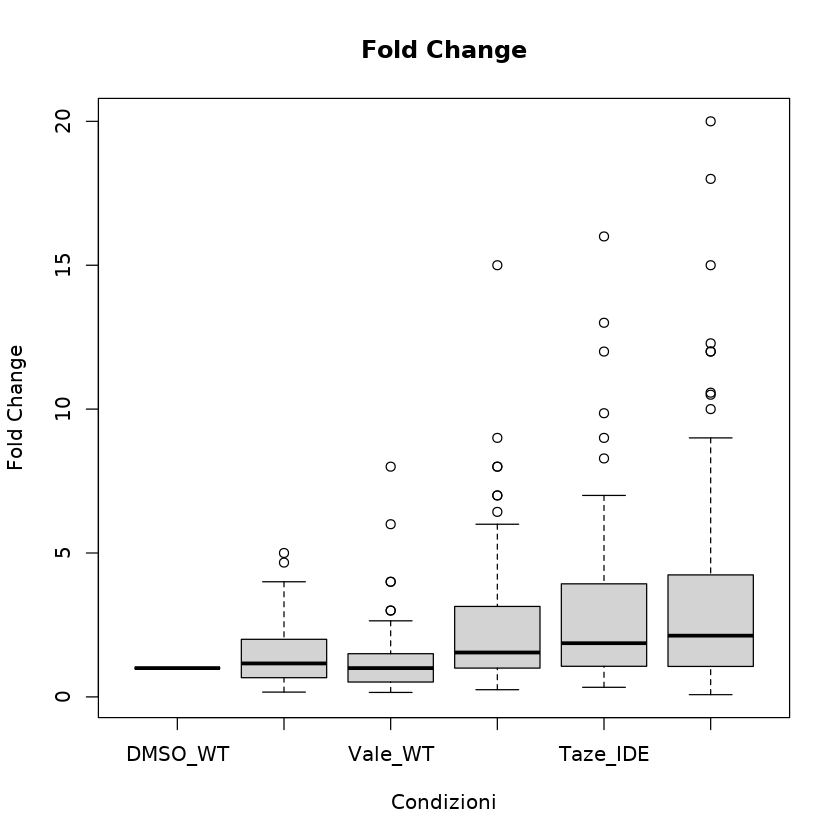

In [8]:
data <- read.csv(paste(results,"/RPMCOmparison/","count_hgtgts.csv",sep=""), header = TRUE, row.names = 1, sep = ",")
data=data+1
# Calcolo del fold change tra DMSO Idelalisib e DMSO WT
foldChange_IDE_DMSO <- (data$Idelalisib_DMSO / data$AID_WT_DMSO)
foldChange_IDE_Taze <- (data$Idelalisib_Taze / data$AID_WT_DMSO)
foldChange_IDE_Vale <- (data$Idelalisib_Vale / data$AID_WT_DMSO)
foldChange_AID_WT_Taze <- (data$AID_WT_Taze / data$AID_WT_DMSO)
foldChange_AID_WT_Vale <- (data$AID_WT_Vale / data$AID_WT_DMSO)
dmso_WT = rep(1,length(foldChange_AID_WT_Vale)/20)
# Creazione della tabella con i fold change
foldChange_table <- data.frame(DMSO_WT=dmso_WT,Taze_WT=foldChange_AID_WT_Taze,Vale_WT=foldChange_AID_WT_Vale,DMSO_IDE = foldChange_IDE_DMSO, Taze_IDE = foldChange_IDE_Taze, Vale_IDE = foldChange_IDE_Vale)


# Creazione del boxplot per i fold change
boxplot(foldChange_table, main = "Fold Change", xlab = "Condizioni", ylab = "Fold Change")
write.table(foldChange_table,paste(results,"/RPMCOmparison/","boxPlotCount5way.csv",sep=""),col.names=TRUE,row.names=FALSE,sep=",")

In [16]:
a <- read.csv(paste(results,"/RPMCOmparison/","count_hgtgts.csv",sep=""), header = TRUE, row.names = 1, sep = ",")
conditions <- colnames(a)[-1]

# Inizializza un vettore per memorizzare i p-value
p_values <- numeric(length(conditions))


# Ciclo for per confrontare ogni condizione con AID_WT_DMSO e calcolare i p-value
for (i in 1:length(conditions)) {
  condition_of_interest <- a[, conditions[i]]
  reference_condition <- a$AID_WT_DMSO
  
  # Esegui il test t di Student per confrontare la condizione di interesse con la condizione di riferimento
  p_values[i] <- wilcox.test(condition_of_interest, reference_condition)$p.value
}

# Visualizza i p-value per ogni condizione
for (i in 1:length(conditions)) {
  cat("P-value for", conditions[i], "vs AID_WT_DMSO:", p_values[i], "\n")
}
 #Calcola il p-value per Idelalisib_Taze e Idelalisib_Vale rispetto a Idelalisib_DMSO
idelalisib_taze_p_value <- wilcox.test(a$Idelalisib_Taze, a$Idelalisib_DMSO)$p.value
idelalisib_vale_p_value <- wilcox.test(a$Idelalisib_Vale, a$Idelalisib_DMSO)$p.value

# Aggiungi i p-value di Idelalisib_Taze e Idelalisib_Vale alla lista
p_values[["Idelalisib_Taze"]] <- idelalisib_taze_p_value
p_values[["Idelalisib_Vale"]] <- idelalisib_vale_p_value



# Visualizza i p-value per Idelalisib_Taze e Idelalisib_Vale
cat("P-value for Idelalisib_Taze vs Idelalisib_DMSO:", idelalisib_taze_p_value, "\n")
cat("P-value for Idelalisib_Vale vs Idelalisib_DMSO:", idelalisib_vale_p_value, "\n")

idelalisib_taze_p_value <- wilcox.test(a$Idelalisib_Taze, a$WT_Taze)$p.value
idelalisib_vale_p_value <- wilcox.test(a$Idelalisib_Vale, a$WT_Vale)$p.value
cat("P-value for Idelalisib_Taze vs WT Taze:", idelalisib_taze_p_value, "\n")
cat("P-value for Idelalisib_Vale vs WT Vale:", idelalisib_vale_p_value, "\n")

P-value for AID_WT_Taze vs AID_WT_DMSO: 0.4730385 
P-value for AID_WT_Vale vs AID_WT_DMSO: 0.6251078 
P-value for AID_KO_DMSO vs AID_WT_DMSO: 6.627474e-16 
P-value for AID_KO_Taze vs AID_WT_DMSO: 7.184601e-19 
P-value for AID_KO_Vale vs AID_WT_DMSO: 1.003221e-18 
P-value for Idelalisib_DMSO vs AID_WT_DMSO: 0.0002882826 
P-value for Idelalisib_Taze vs AID_WT_DMSO: 1.965882e-05 
P-value for Idelalisib_Vale vs AID_WT_DMSO: 2.219339e-06 
P-value for Idelalisib_Taze vs Idelalisib_DMSO: 0.2902819 
P-value for Idelalisib_Vale vs Idelalisib_DMSO: 0.1063428 
P-value for Idelalisib_Taze vs WT Taze: 3.667884e-15 
P-value for Idelalisib_Vale vs WT Vale: 5.352157e-15 


P-value for AID_WT_Taze vs AID_WT_DMSO: 0.9531577 
P-value for AID_WT_Vale vs AID_WT_DMSO: 0.006717393 
P-value for AID_KO_DMSO vs AID_WT_DMSO: 8.616337e-18 
P-value for AID_KO_Taze vs AID_WT_DMSO: 1.669501e-20 
P-value for AID_KO_Vale vs AID_WT_DMSO: 7.780534e-21 
P-value for Idelalisib_DMSO vs AID_WT_DMSO: 0.00272897 
P-value for Idelalisib_Taze vs AID_WT_DMSO: 0.00014592 
P-value for Idelalisib_Vale vs AID_WT_DMSO: 2.073809e-05 
P-value for Idelalisib_Taze vs Idelalisib_DMSO: 0.5102365 
P-value for Idelalisib_Vale vs Idelalisib_DMSO: 0.2123377 
P-value for Idelalisib_Taze vs WT Taze: 3.667884e-15 
P-value for Idelalisib_Vale vs WT Vale: 5.352157e-15 


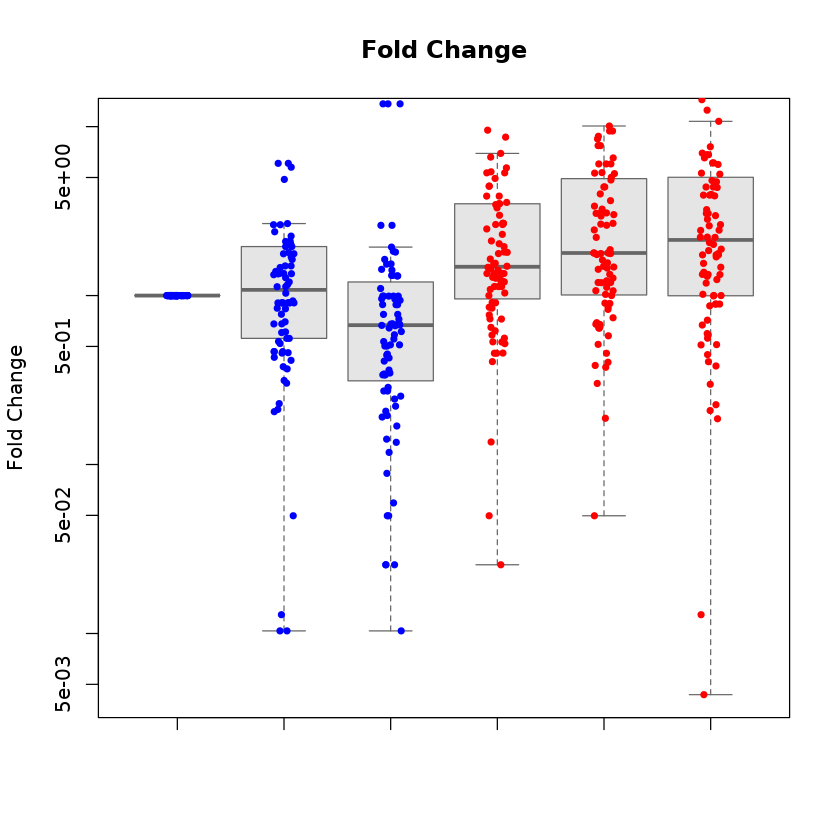

In [18]:
data <- read.csv(paste(results,"/RPMCOmparison/","rpm_hgtgtsHeatmap.csv",sep=""), header = TRUE, row.names = 1, sep = ",")
data=data+1
# Calcolo del fold change tra DMSO Idelalisib e DMSO WT
foldChange_IDE_DMSO <- (data$Idelalisib_DMSO / data$AID_WT_DMSO)
foldChange_IDE_Taze <- (data$Idelalisib_Taze / data$AID_WT_DMSO)
foldChange_IDE_Vale <- (data$Idelalisib_Vale / data$AID_WT_DMSO)
foldChange_AID_WT_Taze <- (data$AID_WT_Taze / data$AID_WT_DMSO)
foldChange_AID_WT_Vale <- (data$AID_WT_Vale / data$AID_WT_DMSO)
dmso_WT = rep(1,length(foldChange_AID_WT_Vale)/20)
# Creazione della tabella con i fold change
foldChange_table <- data.frame(DMSO_WT=dmso_WT,Taze_WT=foldChange_AID_WT_Taze,Vale_WT=foldChange_AID_WT_Vale,DMSO_IDE = foldChange_IDE_DMSO, Taze_IDE = foldChange_IDE_Taze, Vale_IDE = foldChange_IDE_Vale)
colnames(foldChange_table)=c("DMSO","Tazemetostat","Valemetostat","Idelalisib","Idelalisib+Tazemetostat","Idelalisib+Valemetostat")
# Creazione del boxplot per i fold change
boxplot(foldChange_table, xaxt = "n", main = "Fold Change", xlab = "", 
        ylab = "Fold Change", outline = FALSE, col = "gray90", border = "gray40",log="y")

# Aggiungi i puntini uno per uno, colorando in base alla condizione
for (i in 1:ncol(foldChange_table)) {
  color <- if (grepl("Idelalisib", colnames(foldChange_table)[i], ignore.case = TRUE)) "red" else "blue"
  
  stripchart(foldChange_table[[i]], vertical = TRUE, method = "jitter", 
             pch = 20, col = color, add = TRUE, at = i)
}


# Aggiungi le etichette ruotate
labels <- colnames(foldChange_table)
axis(1, at = 1:length(labels), labels = FALSE)
text(x = 1:length(labels), y = par("usr")[3] - 0.3, srt = 45, adj = 1,
     labels = labels, xpd = TRUE,cex = 0.6)#write.table(foldChange_table,paste(results,"/RPMCOmparison/","boxPlotCount5way.csv",sep=""),col.names=TRUE,row.names=FALSE,sep=",")

a <- read.csv(paste(results,"/RPMCOmparison/","rpm_hgtgtsHeatmap.csv",sep=""), header = TRUE, row.names = 1, sep = ",")
conditions <- colnames(a)[-1]

# Inizializza un vettore per memorizzare i p-value
p_values <- numeric(length(conditions))


# Ciclo for per confrontare ogni condizione con AID_WT_DMSO e calcolare i p-value
for (i in 1:length(conditions)) {
  condition_of_interest <- a[, conditions[i]]
  reference_condition <- a$AID_WT_DMSO
  
  # Esegui il test t di Student per confrontare la condizione di interesse con la condizione di riferimento
  p_values[i] <- wilcox.test(condition_of_interest, reference_condition)$p.value
}

# Visualizza i p-value per ogni condizione
for (i in 1:length(conditions)) {
  cat("P-value for", conditions[i], "vs AID_WT_DMSO:", p_values[i], "\n")
}
 #Calcola il p-value per Idelalisib_Taze e Idelalisib_Vale rispetto a Idelalisib_DMSO
idelalisib_taze_p_value <- wilcox.test(a$Idelalisib_Taze, a$Idelalisib_DMSO)$p.value
idelalisib_vale_p_value <- wilcox.test(a$Idelalisib_Vale, a$Idelalisib_DMSO)$p.value

# Aggiungi i p-value di Idelalisib_Taze e Idelalisib_Vale alla lista
p_values[["Idelalisib_Taze"]] <- idelalisib_taze_p_value
p_values[["Idelalisib_Vale"]] <- idelalisib_vale_p_value



# Visualizza i p-value per Idelalisib_Taze e Idelalisib_Vale
cat("P-value for Idelalisib_Taze vs Idelalisib_DMSO:", idelalisib_taze_p_value, "\n")
cat("P-value for Idelalisib_Vale vs Idelalisib_DMSO:", idelalisib_vale_p_value, "\n")

idelalisib_taze_p_value <- wilcox.test(a$Idelalisib_Taze, a$WT_Taze)$p.value
idelalisib_vale_p_value <- wilcox.test(a$Idelalisib_Vale, a$WT_Vale)$p.value
cat("P-value for Idelalisib_Taze vs WT Taze:", idelalisib_taze_p_value, "\n")
cat("P-value for Idelalisib_Vale vs WT Vale:", idelalisib_vale_p_value, "\n")

In [ ]:
P-value for AID_WT_Taze vs AID_WT_DMSO: 0.4730385 
P-value for AID_WT_Vale vs AID_WT_DMSO: 0.6251078 
P-value for AID_KO_DMSO vs AID_WT_DMSO: 6.627474e-16 
P-value for AID_KO_Taze vs AID_WT_DMSO: 7.184601e-19 
P-value for AID_KO_Vale vs AID_WT_DMSO: 1.003221e-18 
P-value for Idelalisib_DMSO vs AID_WT_DMSO: 0.0002882826 
P-value for Idelalisib_Taze vs AID_WT_DMSO: 1.965882e-05 
P-value for Idelalisib_Vale vs AID_WT_DMSO: 2.219339e-06 
P-value for Idelalisib_Taze vs Idelalisib_DMSO: 0.01905875 
P-value for Idelalisib_Vale vs Idelalisib_DMSO: 0.001092213 
P-value for Idelalisib_Taze vs WT Taze: 3.667884e-15 
P-value for Idelalisib_Vale vs WT Vale: 5.352157e-15 

In [10]:
data1=read.table(paste(results,"/RPMCOmparison/","DMSOrpm_FAIR.csv",sep=""),header=TRUE,sep=",",row.names=1)
data2=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
newNames=c()
for(i in rownames(data1)){
    if(unique(data2[which(data2$hotspotID==i),"annotation"])=="NULL"){newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))}else if(length(strsplit(unique(data2[which(data2$hotspotID==i),"annotation"]),"_")[[1]])>3){ 
        newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))
    }
    else{
newNames=append(newNames,unique(data2[which(data2$hotspotID==i),"annotation"]))}
}
rownames(data1)=newNames
increased=which(data1$Idelalisib_DMSO - data1$AID_WT_DMSO>0)
print(length(increased)/nrow(data1))
print(paste(length(increased),"increased over",nrow(data1)))
write.table(data1[increased,],paste(results,"/RPMCOmparison/","DMSOrpm_FAIR_ANNOTATED.csv",sep=""),col.names=NA,sep=",")


[1] 0.6981132
[1] "37 increased over 53"


In [8]:
data1=read.table(paste(results,"/RPMCOmparison/","Tazerpm_FAIR.csv",sep=""),header=TRUE,sep=",",row.names=1)
data2=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
newNames=c()
for(i in rownames(data1)){
    if(unique(data2[which(data2$hotspotID==i),"annotation"])=="NULL"){newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))}else if(length(strsplit(unique(data2[which(data2$hotspotID==i),"annotation"]),"_")[[1]])>3){ 
        newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))
    }
    else{
newNames=append(newNames,unique(data2[which(data2$hotspotID==i),"annotation"]))}
}
rownames(data1)=newNames
increased=which(data1$Idelalisib_Taze - data1$AID_WT_Taze>0)
print(length(increased)/nrow(data1))
print(paste(length(increased),"increased over",nrow(data1)))
write.table(data1[increased,],paste(results,"/RPMCOmparison/","Tazerpm_FAIR_ANNOTATED.csv",sep=""),col.names=NA,sep=",")


[1] 0.7846154
[1] "51 increased over 65"


In [9]:
data1=read.table(paste(results,"/RPMCOmparison/","Valerpm_FAIR.csv",sep=""),header=TRUE,sep=",",row.names=1)
data2=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
newNames=c()
for(i in rownames(data1)){
    if(unique(data2[which(data2$hotspotID==i),"annotation"])=="NULL"){newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))}else if(length(strsplit(unique(data2[which(data2$hotspotID==i),"annotation"]),"_")[[1]])>3){ 
        newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))
    }
    else{
newNames=append(newNames,unique(data2[which(data2$hotspotID==i),"annotation"]))}
}
rownames(data1)=newNames
increased=which(data1$Idelalisib_Vale - data1$AID_WT_Vale>0)
print(length(increased)/nrow(data1))
print(paste(length(increased),"increased over",nrow(data1)))
write.table(data1[increased,],paste(results,"/RPMCOmparison/","Valerpm_FAIR_ANNOTATED.csv",sep=""),col.names=NA,sep=",")


[1] 0.9545455
[1] "63 increased over 66"


[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48 49 50 51
[51] 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77
[76] 78 79 80